In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns 
data = pd.read_csv(r"C:\Users\Admin\Downloads\student performance data\StudentsPerformance.csv")

In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [30]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [38]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [40]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
data.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [46]:
data.dropna(inplace = True)


ValueError: could not convert string to float: 'female'

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score






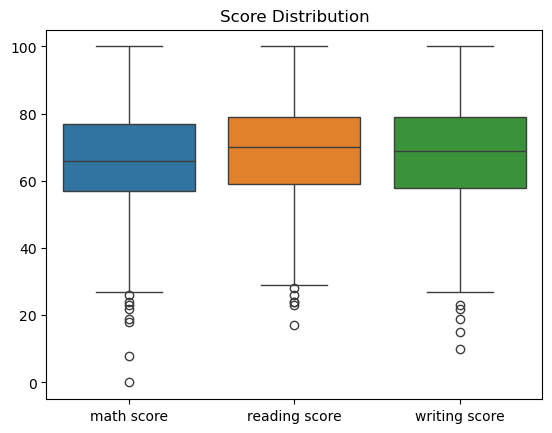

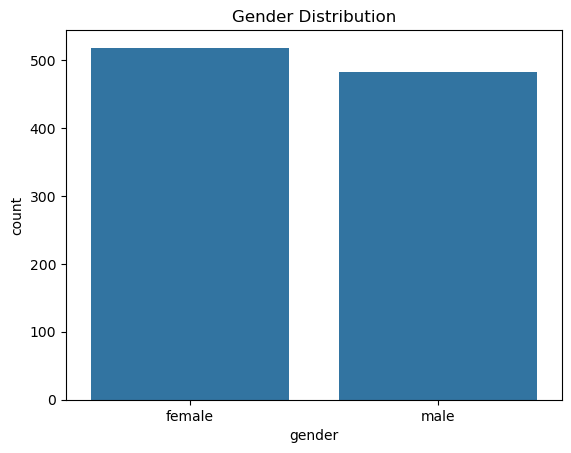

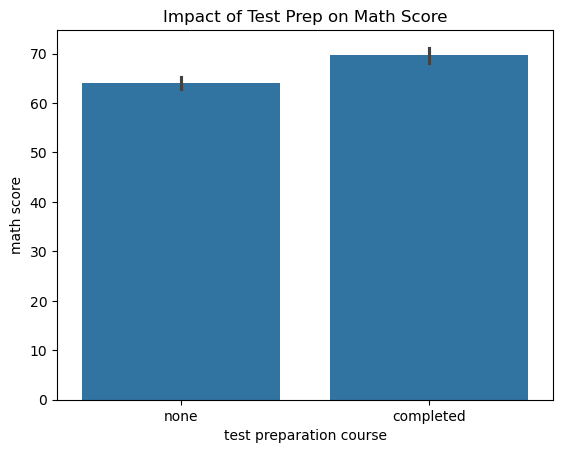

In [59]:
sns.boxplot(data=data[['math score','reading score','writing score']])
plt.title("Score Distribution")
plt.show()

sns.countplot(x='gender', data=data)
plt.title("Gender Distribution")
plt.show()

sns.barplot(x='test preparation course', y='math score', data=data)
plt.title("Impact of Test Prep on Math Score")
plt.show()


In [118]:
X = data.drop(['performance_label'], axis=1)
y = data['performance_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(" Naive Bayes Accuracy:", accuracy_score(y_test,y_pred_nb))


 Naive Bayes Accuracy: 0.965


In [122]:
le = LabelEncoder()
for col in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
    data[col] = le.fit_transform(data[col])

data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data['performance_label'] = np.where(data['average_score'] >= 70, 1, 0)


X = data.drop(['performance_label', 'average_score'], axis=1)
y = data['performance_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(" Classification Algorithm Used: Naive Bayes Classifier\n")
print(" Accuracy Score:", accuracy_score(y_test, y_pred))




 Classification Algorithm Used: Naive Bayes Classifier

 Accuracy Score: 0.96



 Naive Bayes Classification Results
-----------------------------------------
 Accuracy: 0.96

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       110
           1       0.96      0.96      0.96        90

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



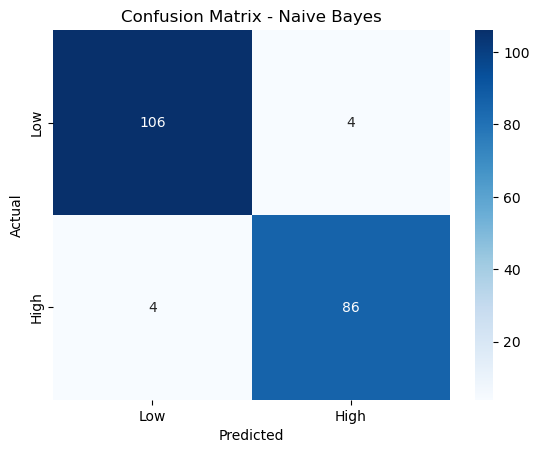


 Top Influencing Features (Mutual Information):

reading score                  0.526330
writing score                  0.493475
math score                     0.404200
lunch                          0.048006
race/ethnicity                 0.021366
test preparation course        0.020161
gender                         0.012966
parental level of education    0.011499
dtype: float64


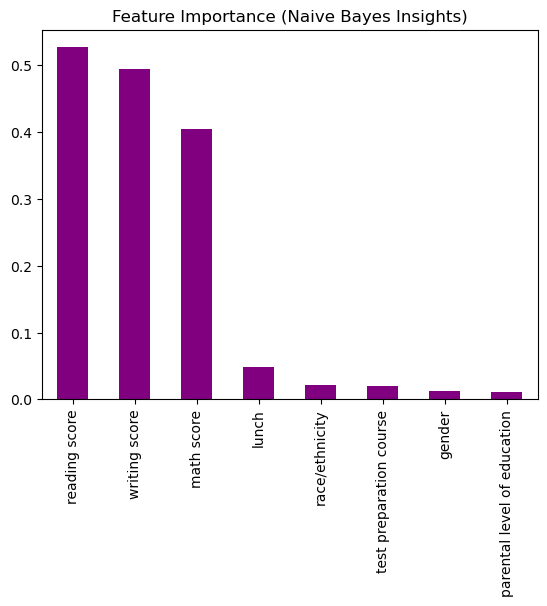


 5-Fold Cross Validation Accuracy: [0.97 0.97 0.98 0.96 0.96]
   → Average: 0.968

 Probability Predictions (First 5 Students):
[[8.42144679e-06 9.99991579e-01]
 [9.84469707e-01 1.55302926e-02]
 [3.06555929e-02 9.69344407e-01]
 [1.34590940e-01 8.65409060e-01]
 [5.97358286e-05 9.99940264e-01]]

 Custom Student Prediction
Predicted Performance: High
Prediction Confidence: [[0.17474399 0.82525601]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train and split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#Naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


print("\n Naive Bayes Classification Results")
print("-----------------------------------------")
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Low','High'], yticklabels=['Low','High'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("\n Top Influencing Features (Mutual Information):\n")
print(mi_series)

mi_series.plot(kind='bar', title="Feature Importance (Naive Bayes Insights)", color='purple')
plt.show()


cv_scores = cross_val_score(nb, X_scaled, y, cv=5)
print("\n 5-Fold Cross Validation Accuracy:", cv_scores)
print("   → Average:", cv_scores.mean())

print("\n Probability Predictions (First 5 Students):")
proba = nb.predict_proba(X_test[:5])
print(proba)


sample = np.array([[1,2,3,1,1,72,74,71]])  
sample = scaler.transform(sample)
pred_class = nb.predict(sample)
pred_prob = nb.predict_proba(sample)

print("\n Custom Student Prediction")
print("Predicted Performance:", "High" if pred_class==1 else "Low")
print("Prediction Confidence:", pred_prob)